In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CNN autoL2
df1 = pd.read_csv('./result/01_1e-5.csv')
df2 = pd.read_csv('./result/01_5e-4.csv')
df3 = pd.read_csv('./result/01_1e-4.csv')
df4 = pd.read_csv('./result/01_autoL2.csv')
# df.head()

# CNN autoL2 with batch normalization
bn_df1 = pd.read_csv('./result/02_bn_1e-05.csv')
bn_df2 = pd.read_csv('./result/02_bn_5e-04.csv')
bn_df3 = pd.read_csv('./result/02_bn_1e-04.csv')
bn_df4 = pd.read_csv('./result/02_bn_autoL2.csv')

# CNN autoL2 with percentage modification
pct5_df1 = pd.read_csv('./result/03_autoL2_by5pctg.csv')
pct5_df2 = pd.read_csv('./result/03_autoL2_by5pctg_bn.csv')
pct10_df1 = pd.read_csv('./result/03_autoL2_by10pctg.csv')
pct10_df2 = pd.read_csv('./result/03_autoL2_by10pctg_bn.csv')

# CNN autoL2 with increase/decrease lambda
adv_df1 = pd.read_csv('./result/04_AdvanceL2.csv')
adv_df2 = pd.read_csv('./result/04_AdvanceL2_bn.csv')

# exactly the same as those above, second attempt
adv_df1c = pd.read_csv('./result/04_AdvanceL2_attempt2.csv')
adv_df2c = pd.read_csv('./result/04_AdvanceL2_bn_attempt2.csv')

# CNN autoL2 with increase/decrease lambda plus percentage modification
adv_5_df1 = pd.read_csv('./result/05_AdvanceL2_by5pctg.csv')
adv_5_df2 = pd.read_csv('./result/05_AdvanceL2_by5pctg_bn.csv')

In [2]:
batch_size = 128
batch_num = int(50000/batch_size) +1
print(batch_num)

391


In [5]:
df1

,epochs,steps,Lambda_L2s,train_bareloss,train_loss,train_acc,test_bareloss,test_loss,test_acc,id,num_epochs,batch_size,batch_norm,learning_rate,epoch_steps
0,0,5,0.00001,2.221829,2.235760,15.62500,0.017581,0.017691,0.1511,cnn_test_L2_1e-5_200epochs,200,128,False,0.01,0.012788
1,0,10,0.00001,2.164757,2.178688,22.65625,0.017051,0.017161,0.2120,cnn_test_L2_1e-5_201epochs,200,128,False,0.01,0.025575
2,0,15,0.00001,2.132605,2.146537,28.90625,0.016668,0.016778,0.2605,cnn_test_L2_1e-5_202epochs,200,128,False,0.01,0.038363
3,0,20,0.00001,2.080066,2.093998,27.34375,0.016301,0.016411,0.2756,cnn_test_L2_1e-5_203epochs,200,128,False,0.01,0.051151
4,0,25,0.00001,2.038645,2.052578,26.56250,0.015960,0.016070,0.2885,cnn_test_L2_1e-5_204epochs,200,128,False,0.01,0.063939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,199,370,0.00001,0.000733,0.017334,100.00000,0.012690,0.012821,0.7287,cnn_test_L2_1e-5_15795epochs,200,128,False,0.01,199.946292
15596,199,375,0.00001,0.000865,0.017466,100.00000,0.012690,0.012821,0.7284,cnn_test_L2_1e-5_15796epochs,200,128,False,0.01,199.959079
15597,199,380,0.00001,0.001130,0.017731,100.00000,0.012680,0.012811,0.7287,cnn_test_L2_1e-5_15797epochs,200,128,False,0.01,199.971867
15598,199,385,0.00001,0.001000,0.017601,100.00000,0.012681,0.012812,0.7288,cnn_test_L2_1e-5_15798epochs,200,128,False,0.01,199.984655


In [3]:
def plot_preparation(my_df, N):
    df = my_df.copy()
    df['epoch_steps'] = df['epochs'] + df['steps']/N
    df['test_acc'] = df['test_acc']/100
    return df

df1 = plot_preparation(df1, batch_num)
df2 = plot_preparation(df2, batch_num)
df3 = plot_preparation(df3, batch_num)
df4 = plot_preparation(df4, batch_num)

bn_df1 = plot_preparation(bn_df1, batch_num)
bn_df2 = plot_preparation(bn_df2, batch_num)
bn_df3 = plot_preparation(bn_df3, batch_num)
bn_df4 = plot_preparation(bn_df4, batch_num)

pct5_df1 = plot_preparation(pct5_df1, batch_num)
pct5_df2 = plot_preparation(pct5_df2, batch_num)
pct10_df1 = plot_preparation(pct10_df1, batch_num)
pct10_df2 = plot_preparation(pct10_df2, batch_num)

adv_df1 = plot_preparation(adv_df1, batch_num)
adv_df2 = plot_preparation(adv_df2, batch_num)

adv_df1c = plot_preparation(adv_df1c, batch_num)
adv_df2c = plot_preparation(adv_df2c, batch_num)

adv_5_df1 = plot_preparation(adv_5_df1, batch_num)
adv_5_df2 = plot_preparation(adv_5_df2, batch_num)


Text(0, 0.5, 'Lambda')

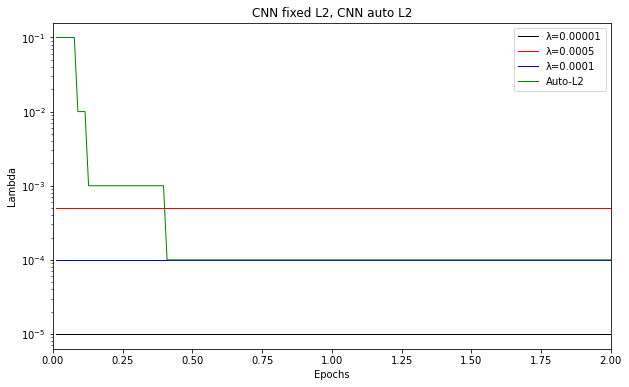

In [4]:
fig = plt.figure(figsize = (10,6))

plt.plot(df1['epoch_steps'],
         df1['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'black',
        )
plt.plot(df2['epoch_steps'],
         df2['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'red',
        )
plt.plot(df3['epoch_steps'],
         df3['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'blue',
        )
plt.plot(df4['epoch_steps'],
         df4['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'green',
        )

plt.xlim([0, 2])
plt.yscale('log')
plt.title('CNN fixed L2, CNN auto L2')
plt.legend(["λ=0.00001" ,"λ=0.0005", "λ=0.0001", "Auto-L2"])
plt.xlabel('Epochs')
plt.ylabel('Lambda')

Text(0, 0.5, 'Lambda')

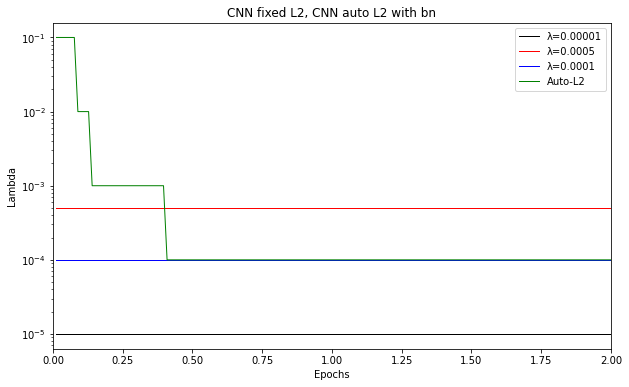

In [25]:
fig = plt.figure(figsize = (10,6))

plt.plot(bn_df1['epoch_steps'],
         bn_df1['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'black',
        )
plt.plot(bn_df2['epoch_steps'],
         bn_df2['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'red',
        )
plt.plot(bn_df3['epoch_steps'],
         bn_df3['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'blue',
        )
plt.plot(bn_df4['epoch_steps'],
         bn_df4['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'green',
        )

plt.xlim([0, 2])
plt.yscale('log')
plt.title('CNN fixed L2, CNN auto L2 with bn')
plt.legend(["λ=0.00001" ,"λ=0.0005", "λ=0.0001", "Auto-L2"])
plt.xlabel('Epochs')
plt.ylabel('Lambda')

Text(0, 0.5, 'Lambda')

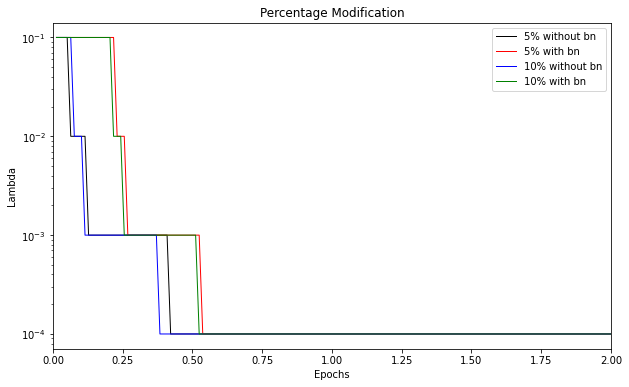

In [26]:
fig = plt.figure(figsize = (10,6))

plt.plot(pct5_df1['epoch_steps'],
         pct5_df1['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'black',
        )
plt.plot(pct5_df2['epoch_steps'],
         pct5_df2['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'red',
        )
plt.plot(pct10_df1['epoch_steps'],
         pct10_df1['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'blue',
        )
plt.plot(pct10_df2['epoch_steps'],
         pct10_df2['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'green',
        )

plt.xlim([0, 2])
plt.yscale('log')
plt.title('Percentage Modification')
plt.legend(["5% without bn" ,"5% with bn", "10% without bn", "10% with bn"])
plt.xlabel('Epochs')
plt.ylabel('Lambda')

Text(0, 0.5, 'Lambda')

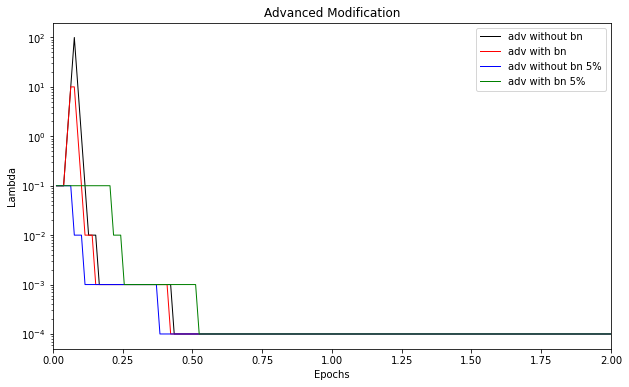

In [27]:
fig = plt.figure(figsize = (10,6))

plt.plot(adv_df1['epoch_steps'],
         adv_df1['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'black',
        )
plt.plot(adv_df2['epoch_steps'],
         adv_df2['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'red',
        )
plt.plot(adv_5_df1['epoch_steps'],
         pct10_df1['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'blue',
        )
plt.plot(adv_5_df2['epoch_steps'],
         pct10_df2['Lambda_L2s'],
         linestyle = '-',
         linewidth = 1,
         color = 'green',
        )

plt.xlim([0, 2])
plt.yscale('log')
plt.title('Advanced Modification')
plt.legend(["adv without bn" ,"adv with bn", "adv without bn 5%", "adv with bn 5%"])
plt.xlabel('Epochs')
plt.ylabel('Lambda')